# TS6: Respuesta en frecuencia de Filtros Pasivos RLC

### Autoras: Angelina Fantauzzo Fabio y Noelia Ferrari


**Consigna**: 


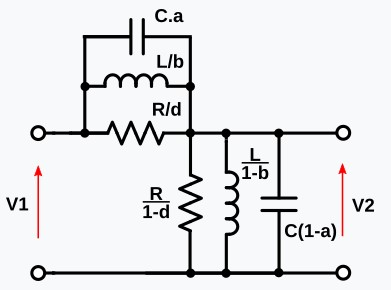

In [3]:
from IPython.display import Image
import os
Image(filename=os.path.join(r"D:\APS2C\APS_nueva\TS6", "1.jpg"))

1. Demostrar que la función de transferencia $$
                                             T(s)=\frac{V_2(s)}{V_1(s)}
                                             $$

se corresponde con una **sección bicuadrática ($\text{SOS}$)**, es decir:

$$
T(s)=k\cdot\frac{s^{2}+\dfrac{\omega_{0Z}}{Q_{Z}}\,s+\omega_{0Z}^{2}}
{s^{2}+\dfrac{\omega_{0P}}{Q_{P}}\,s+\omega_{0P}^{2}}.
$$

2. Parametrice los polinomios de segundo orden, hallando los parámetros $k, \omega_{0Z}, Q_{Z}, \omega_{0P}, Q_{P}$ en función de los elementos de la red.

3. Para cada función, utilice la **red bicuadrática** para implementarla:

1. La función $T_1(s)$:
$$
T_1(s) = \frac{s^{2}+9}{s^{2}+s\sqrt{2}+1}
$$

2. La función $T_2(s)$:
$$
T_2(s) = \frac{s^{2}+1/9}{s^{2}+s\frac{1}{5}+1}
$$

3. La función $T_3(s)$:
$$
T_3(s) = \frac{s^{2}+s\frac{1}{5}+1}{s^{2}+s\sqrt{2}+1}
$$

4. Dibuje el **diagrama de polos y ceros** de $H(s)$, indique la localización de polos y ceros en función de los parámetros.

5. Calcular y graficar la **respuesta de módulo y fase**, indicando la **respuesta asintótica** donde corresponda.

## Introducción teórica

Este trabajo el circuito propuesto corresponde a una **red pasiva de segundo orden** compuesta por resitencias, inductancias y capacitores, cuyos valores están dador por parámetros a, b y d. 
La función de transferencia:
$$                                           T(s)=\frac{V_2(s)}{V_1(s)}
$$
puede expresarse en la forma general de una **sección bicuadrática (SOS, Second Order Section)**, que se utiliza ampliamente en la construcción de filtros.

La sección bicuadrática se expresa como:
$$
T(s)=k\cdot\frac{s^{2}+\dfrac{\omega_{0Z}}{Q_{Z}}\,s+\omega_{0Z}^{2}}
{s^{2}+\dfrac{\omega_{0P}}{Q_{P}}\,s+\omega_{0P}^{2}}.
$$
donde:
* $k$: Es la ganancia.
* $\omega_{0Z}$ y $\omega_{0P}$: Son las frecuencias angulares características asociadas a los ceros y polos del sistema, respectivamente.
* $Q_Z$ y $Q_P$: Son los factores de calidad que determinan el amortiguamiento o selectividad de los ceros y polos.

## Punto 1

Para el primerejercicio conviene analizar el circuito por admitancias debido a que como las ramas estan paralelo en admitancias se calculan en forma de sumatoria.


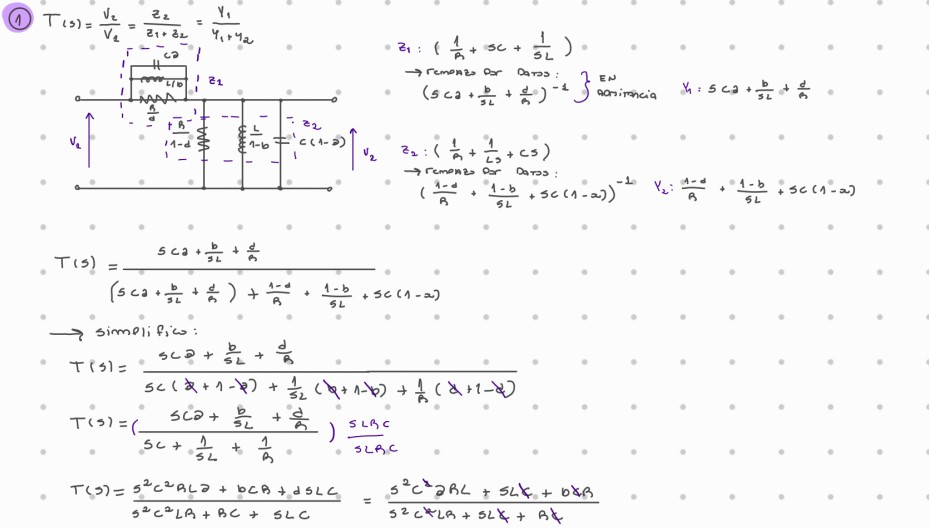

In [4]:
from IPython.display import Image
import os
Image(filename=os.path.join(r"D:\APS2C\APS_nueva\TS6", "3.jpg"))

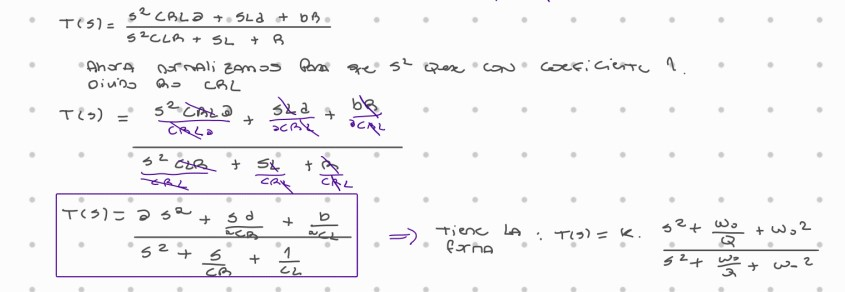

In [5]:
from IPython.display import Image
import os
Image(filename=os.path.join(r"D:\APS2C\APS_nueva\TS6", "4.jpg"))

## Punto 2